## OpenPIV tutorial 2

In this notebook we compare the time to run the same analysis using Cython (precompiled) version
with the Python process using FFT and/or direct cross-correlation method

In [1]:
from openpiv import tools, process, scaling, pyprocess, validation, filters
import numpy as np
import pylab
%matplotlib inline
from pkg_resources import resource_filename as filename

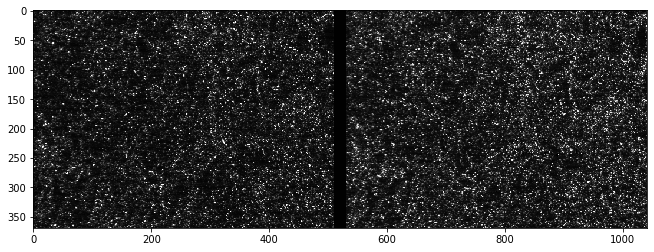

In [2]:
# load images
frame_a  = tools.imread( filename('openpiv','examples/test1/exp1_001_a.bmp' ))
frame_b  = tools.imread( filename('openpiv','examples/test1/exp1_001_b.bmp' ))

# show images
pylab.figure(figsize=(11,8))
pylab.imshow(np.c_[frame_a,np.ones((frame_a.shape[0],20)),frame_b],cmap=pylab.cm.gray)

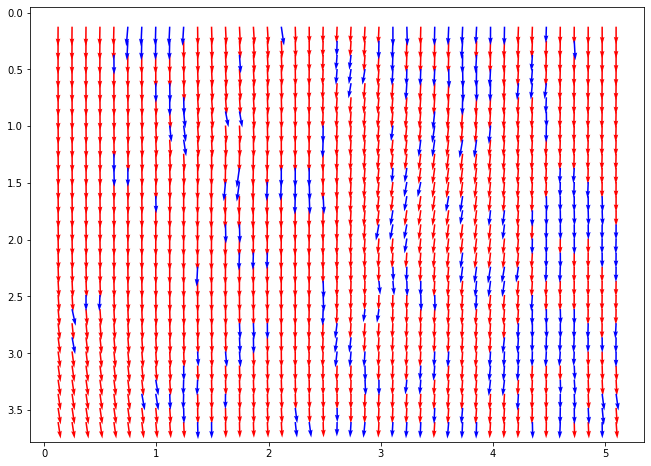

CPU times: user 1.65 s, sys: 80.7 ms, total: 1.73 s
Wall time: 1.35 s


In [3]:
%%time

u, v, sig2noise = process.extended_search_area_piv( frame_a.astype(np.int32), frame_b.astype(np.int32), 
                                                   window_size=24, overlap=12, dt=0.02, 
                                                   search_area_size=64, sig2noise_method='peak2peak' )
x, y = process.get_coordinates( image_size=frame_a.shape, window_size=24, overlap=12 )
u, v, mask = validation.sig2noise_val( u, v, sig2noise, threshold = 2.5 )
u, v = filters.replace_outliers( u, v, method='localmean', max_iter=10, kernel_size=2)
x, y, u, v = scaling.uniform(x, y, u, v, scaling_factor = 96.52 )

tools.save(x, y, u, v, mask, 'exp1_001_extended.txt' )
tools.display_vector_field('exp1_001_extended.txt', scale=100, width=0.0025)

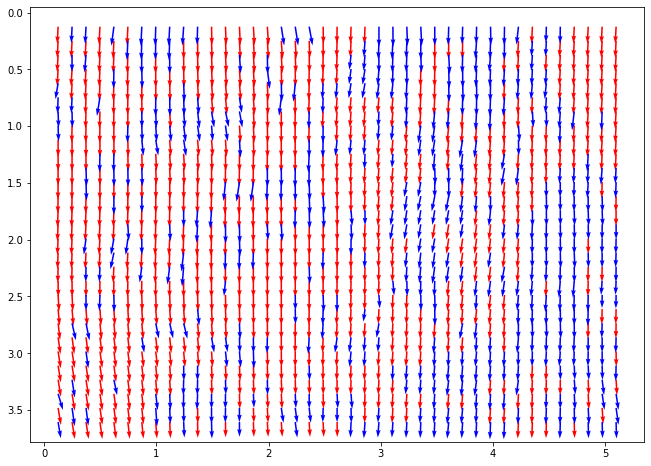

CPU times: user 1.25 s, sys: 61 ms, total: 1.31 s
Wall time: 937 ms


In [4]:
%%time

u, v, sig2noise = pyprocess.extended_search_area_piv( frame_a, frame_b, corr_method='fft', window_size=24, 
                                                     search_area_size=24, overlap=12, 
                                                     dt=0.02, sig2noise_method='peak2peak' )
x, y = pyprocess.get_coordinates( image_size=frame_a.shape, window_size=24, overlap=12 )
u, v, mask = validation.sig2noise_val( u, v, sig2noise, threshold = 2.5 )
u, v = filters.replace_outliers( u, v, method='localmean', max_iter=10, kernel_size=2.5)
x, y, u, v = scaling.uniform(x, y, u, v, scaling_factor = 96.52 )

tools.save(x, y, u, v, mask, 'exp1_001_fft.txt' )
tools.display_vector_field('exp1_001_fft.txt', scale=100, width=0.0025)

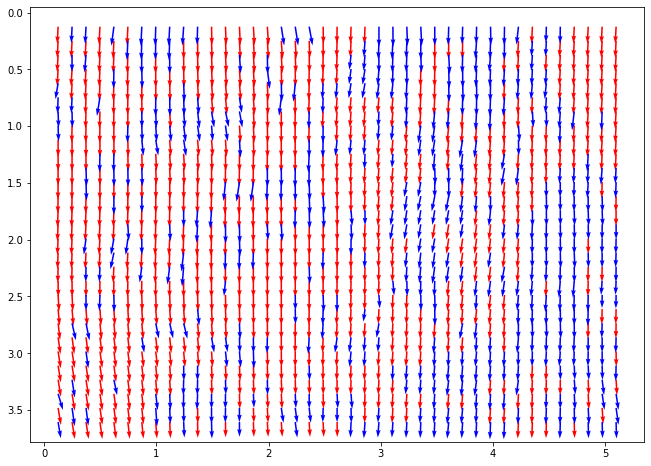

CPU times: user 3.4 s, sys: 68.7 ms, total: 3.46 s
Wall time: 3.08 s


In [5]:
%%time 
u, v, sig2noise = pyprocess.extended_search_area_piv( frame_a, frame_b, 
                                                     corr_method='direct', window_size=24,
                                                     search_area_size=24,
                                                     overlap=12, dt=0.02, 
                                                     sig2noise_method='peak2peak' )
x, y = pyprocess.get_coordinates( image_size=frame_a.shape, window_size=24, overlap=12 )
u, v, mask = validation.sig2noise_val( u, v, sig2noise, threshold = 2.5 )
u, v = filters.replace_outliers( u, v, method='localmean', max_iter=10, kernel_size=2.5)
x, y, u, v = scaling.uniform(x, y, u, v, scaling_factor = 96.52 )
tools.save(x, y, u, v, mask, 'exp1_001_direct.txt' )
tools.display_vector_field('exp1_001_direct.txt', scale=100, width=0.0025)